# Python Geospatial Fundamental: Getting Started with Spatial Dataframes

* * * 

<div class="alert alert-success">  
    
### Learning Objectives 
    
* Recognize different forms of geospatial data and coordinate reference system (CRS).
* Use `GeoPandas` and `matplotlib` libraries to map and analyze spatial data.
</div>

### Icons Used in This Notebook
🔔 **Question**: A quick question to help you understand what's going on.<br>
🥊 **Challenge**: Interactive excersise. We'll work through these in the workshop!<br>
💡 **Tip**: How to do something a bit more efficiently or effectively.<br>
⚠️ **Warning:** Heads-up about tricky stuff or common mistakes.<br>
📝 **Poll:** A Zoom poll to help you learn!<br>
🎬 **Demo**: Showing off something more advanced – so you know what Python can be used for!<br> 

### Sections
1. [Introduction to Geospatial Data](#section1)
2. [Introduction to GeoPandas](#section2)
3. [CRS and Map Projection](#section3)
4. [Mapping and Spatial Analysis](#section4)

Be sure to have text between code cells explaining the material, step-by-step.

Keep the following in mind:
- Keep narrative text limited! 
- Avoid discussion of edge cases or caveats.
- Use colloquial languague and minimal jargon; if you need it, explain it.
- Use **boldface** to highlight key concepts and important terms, but use it sparingly.
- Don't use italics.
- Use en-dash for lists.
- Use `code font` for anything in code like variables, functions, and packages.
- Use `code font` for menu items (like `Restart Kernel`), and data frame rows/columns. 
- When discussing functions, include the trailing parentheses (e.g. `print()`).
- When discussing methods, include the dot (e.g. `.sum()`).
- Consistently use emoji for relevant sections. See below for some examples.

<a id='section1'></a>

# 1. Introduction to Geospatial Data

We will begin today's workshop with an overview of the geospatial data. We will introduce the following concepts that you will frequently encounter when working with geospatial data:

- Geospatial data
- Coordinate Reference Systems (CRS)
- Geographic Coordinate Systems (GCS) and Projected Coordinate Systems (PCS)
- Types of spatial data (vector vs. raster)

## Geographic Data vs. Geospatial Data

<img src="../images/UC%20Berkeley.jpg" width="500"/>
</div>

A single unit of **geographic data** includes:
- **Location (where)**: UC Berkeley
- **Attributes**: data that describe the location

Also great to have metadata:
- **Source**
- **Datum, Projection**

<div>
<img src="../images/Berkeley%20Map.jpg" width="500"/>
</div>

**Geospatial data** encodes location geometrically with coordinates [latitude, longitude]: [37.87131, -122.26019].

## Coordinate Reference Systems (CRS)

A Coordinate Reference System, or CRS, is a system for associating coordinates with a **specific, unambiguous** location on the surface of the Earth. There are two types of coordinate reference systems: **Geographic CRS** and **Projected CRS**.

<div>
<img src="../images/CRS.jpg" width="500"/>
</div>

Geographic CRS use angular units (degrees) while projected CRS use Cartesian units (feet or meters) more commonly used for local or regional mapping and analysis. 

### GCS is widely used and expressed as latitude and longitude.
- CRSs are referenced in software by numeric codes, often callsed **EPSG codes**.
- WGS84 (EPSG: 4325): Based on satellites, used by cell phones, GPS; best overall fit for most places on earth.
- NAD83 (EPSG: 4269): Based on satellite and survey data; best fit for USA; used by many federal data products, like Census data

### PCS transforms geographic coordinates (lat/lon) to 2D coordinates (X/Y)

- All maps projections introduce **distortion** in area, shape, distance or direction. 
- Specific map projections minimize distortion in one or more properties. 
- You need to know the coordinate reference system of your input data.
- You need to select the CRS that is most suitable for your data and application.
- The Mercator projection, for example, is used where angular relationships are important (shape, direction), but areas are distorted, especially as you move away from the equator.

## Types of Spatial Data

There are two fundemental spatial data models:
- Vector
- Raster

<div>
<img src="../images/raster_vector.png" width="350"/>
</div>

<a id='section2'></a>

# 2. Introduction to GeoPandas

In this lesson, we'll learn about a package that is core to using geospatial data in Python: GeoPandas. We'll explore the structure of geospatial data (which, turns out, is not too different from DataFrames!), including geometries, shapefiles, and how to save your hard work.

## What is GeoPandas?

[`GeoPandas`](http://geopandas.org/) is a relatively new package that makes it easier to work with geospatial data in Python. In the last few years it has grown more powerful and stable, allow Python to practioners to more easily and flexibly work with geospatial data in Python, which had been difficult in the past. `GeoPandas` is now the go-to package for working with vector geospatial data in Python. 

If you work with raster data, check out the [`rasterio`](https://rasterio.readthedocs.io/en/latest/) package. We will introduce it briefly in the second half of the workshop.

`GeoPandas` gives you access to all of the functionality of [`pandas`](https://pandas.pydata.org/), which is the primary data analysis tool for working with tabular data in Python. GeoPandas extends pandas with attributes and methods for working with geospatial data. So, if you're familiar with pandas, working with geospatial data is a natural next step.

### Import Libraries

Let's start by importing the libraries that we will use. If you haven't already, you can install `GeoPandas` within this notebook:

In [1]:
# Install GeoPandas if you don't have it yet
%pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd

import matplotlib # Base python plotting library
import matplotlib.pyplot as plt # Submodule of matplotlib

# To display plots, maps, charts etc in the notebook
%matplotlib inline 

### Read in a Shapefile

As we discussed in the initial geospatial overview, a *shapefile* is one type of geospatial data that holds vector data. 

> To learn more about ESRI Shapefiles, this is a good place to start: [ESRI Shapefile Wiki Page](https://en.wikipedia.org/wiki/Shapefile) 

The tricky thing to remember about shapefiles is that they're actually a collection of 3 to 9+ files together. Here's a list of all the files that can make up a shapefile:
 
* `shp`: The main file that stores the feature geometry
* `shx`: The index file that stores the index of the feature geometry  
* `dbf`: The dBASE table that stores the attribute information of features 
* `prj`: The file that stores the coordinate system information. (should be required!)
* `xml`: Metadata: Stores information about the shapefile.
* `cpg`: Specifies the code page for identifying the character set to be used.

But it remains the most commonly used file format for vector spatial data, and it's really easy to visualize in one go!

Let's try it out with [California counties](https://gis.data.ca.gov/datasets/8713ced9b78a4abb97dc130a691a8695_0/about), and use GeoPandas for the first time. We can use a flexible function called `gpd.read_file` to read in many different types of geospatial data. When using it, we'll specify the `shp` file:

In [3]:
# Read in the counties shapefile
counties = gpd.read_file('../data/California_County_Boundaries/cnty19_1.shp')

<Axes: >

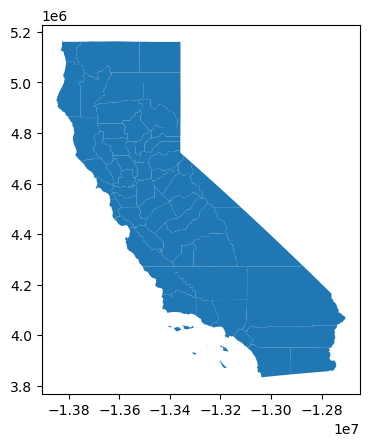

In [4]:
# Plot out California counties
counties.plot()

## Exploring the GeoPandas GeoDataFrame

Before we get in too deep, let's discuss what a *GeoDataFrame* is and how it's different from a pandas *DataFrame*.

A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column. Let's emphasize this point, because it's important:

> A [GeoPandas GeoDataFrame](https://geopandas.org/data_structures.html#geodataframe), or `gdf` for short, is just like a pandas DataFrame (`df`) but with an extra geometry column as well as accompanying methods and attributes that work on that column.

This means all the methods and attributes of a pandas DataFrame also work on a GeoPandas GeoDataFrame!

With that in mind, let's start exploring our dataframe just like we would do in pandas.

In [5]:
# Find the number of rows and columns in counties
counties.shape

(69, 11)

In [6]:
# Look at the first couple of rows in our geodataframe
counties.head()

,OBJECTID,COUNTY_NAM,COUNTY_ABB,COUNTY_NUM,COUNTY_COD,COUNTY_FIP,ISLAND,GlobalID,SHAPE_Leng,SHAPE_Area,geometry
0,1,Alameda,ALA,1,01,001,None,{E6F92268-D2DD-4CFB-8B79-5B4B2F07C559},308998.650975,-3.402787e+09,"POLYGON ((-13611173.233 4566017.932, -13611061..."
1,2,Alpine,ALP,2,02,003,None,{870479B2-480A-494B-8352-AD60578839C1},274888.492662,-3.146939e+09,"POLYGON ((-13312326.921 4680816.110, -13312311..."
2,3,Amador,AMA,3,03,005,None,{4F45B3A6-BE10-461C-8945-6B2AAA7119F6},361708.438649,-2.562635e+09,"POLYGON ((-13366405.546 4679183.529, -13366408..."
3,4,Butte,BUT,4,04,007,None,{44FBA680-AECC-4E04-A499-29D69AFFBD4A},526547.113134,-7.339348e+09,"POLYGON ((-13478186.664 4807593.081, -13478502..."
4,5,Calaveras,CAL,5,05,009,None,{D11EF739-4A1E-414E-BFD1-E7DCD56CD61E},370637.579039,-4.351069e+09,"POLYGON ((-13360333.217 4641182.754, -13360329..."


In [7]:
# Look at all the variables included in our data
counties.columns

Index(['OBJECTID', 'COUNTY_NAM', 'COUNTY_ABB', 'COUNTY_NUM', 'COUNTY_COD',
       'COUNTY_FIP', 'ISLAND', 'GlobalID', 'SHAPE_Leng', 'SHAPE_Area',
       'geometry'],
      dtype='object')

We can make a selection of features in the same way with `pandas`. For exmaple, we can select Alameda County from the 69 counties of California.

In [8]:
alameda_county = counties.loc[counties['COUNTY_NAM'] == 'Alameda'].copy().reset_index(drop=True)

## Save Your Data

Let's not forget to save out our Alameda County geodataframe `alameda_county`. This way we won't need to repeat the processing steps and attribute join we did above.

We can save it as a shapefile:

In [9]:
alameda_county.to_file("../data/alameda_county.shp")

Alternatively, we can save the file into [GeoJSON](https://geojson.org/) format.

In [10]:
alameda_county.to_file("../data/alameda_county.json", driver="GeoJSON")

You can read these in, just as you would for a shapefile with `gpd.read_file`:

In [11]:
alameda_county_test2 = gpd.read_file("../data/alameda_county.json")

There are also many other formats we could use for data output.

💡 **Tip**: If you're working with point data (i.e. a single latitude and longitude value per feature),
then CSV might be a good option!

## Plot the GeoDataFrame

We're able to plot our GeoDataFrame because of the extra `geometry` column. What exactly does this column provide?

### GeoPandas Geometries

There are three main types of geometries that can be associated with your GeoDataFrame: points, lines and polygons.

<img src ="https://datacarpentry.org/organization-geospatial/fig/dc-spatial-vector/pnt_line_poly.png" width="450"></img>

In the GeoDataFrame, these geometries are encoded in a format known as [Well-Known Text (WKT)](https://en.wikipedia.org/wiki/Well-known_text_representation_of_geometry). Consider the following examples:

- POINT (30 10)
- LINESTRING (30 10, 10 30, 40 40)
- POLYGON ((30 10, 40 40, 20 40, 10 20, 30 10))

In each case, coordinates are separated by a spaces, and coordinate pairs are separated by commas.

Your geodataframe may also include the variants **multipoints, multilines, and multipolgyons** if the row-level feature of interest is comprised of multiple parts. For example, a GeoDataFrame of states, where one row represents one state, would have a POLYGON geometry for Utah but MULTIPOLYGON for Hawaii, which includes many islands.

Note that, it's OK to mix and match geometries of the same family, e.g., POLYGON and MULTIPOLYGON, in the same GeoDataFrame.

Let's plot the Alameda County. We can specify the [color](https://matplotlib.org/stable/gallery/color/named_colors.html) of the shape. 

<Axes: >

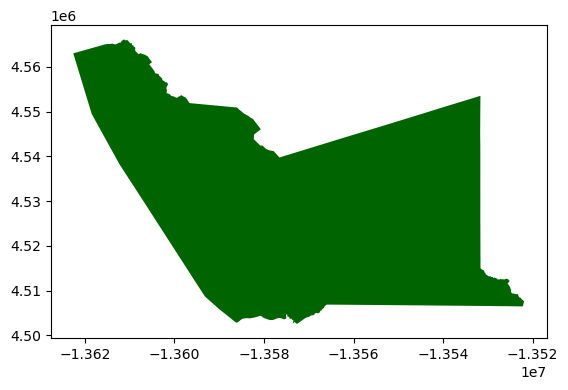

In [12]:
alameda_county.plot(color='darkgreen')

<a id='section3'></a>

# 3. CRS and Map Projections

## Working with CRSs in GeoPandas


### Identifying the CRS of a GeoDataFrame

GeoPandas GeoDataFrames have a `crs` attribute that returns the CRS of the data:

In [13]:
counties.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
print(counties.crs)

EPSG:3857


### Setting the CRS

You can also set the CRS of a GeoDataFrame using the `crs` attribute.  You should set the CRS if is not defined or if you think it is incorrectly defined.

> In desktop GIS terminology, setting the CRS is called **defining the CRS**.

As an example, let's set the CRS of our data to `None`:

In [15]:
# First, set the CRS to None
counties.crs = None

In [16]:
# Check it again
print(counties.crs)

None


💡 **Tip**: if a variable has a null value (None), then displaying it without printing it won't display anything!

Now, we'll set it back to its correct CRS:

In [17]:
# Set it to 3857
counties.crs = "epsg:3857"
counties.crs

<Projected CRS: EPSG:3857>
Name: WGS 84 / Pseudo-Mercator
Axis Info [cartesian]:
- X[east]: Easting (metre)
- Y[north]: Northing (metre)
Area of Use:
- name: World between 85.06°S and 85.06°N.
- bounds: (-180.0, -85.06, 180.0, 85.06)
Coordinate Operation:
- name: Popular Visualisation Pseudo-Mercator
- method: Popular Visualisation Pseudo Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

💡 **Tip**: You can set the CRS to anything you like, but that doesn't make it correct! This is because setting the CRS does not change the coordinate data. It just tells the software how to interpret it.

### Transforming or Reprojecting the CRS

You can transform the CRS of a GeoDataFrame with the `to_crs` method.

> In desktop GIS terminology transforming the CRS is called projecting the data (or reprojecting the data).

When you do this, you should save the output to a new GeoDataFrame.

In [18]:
counties_utm10 = counties.to_crs("epsg:26910")

Now, take a look at the new CRS:

In [19]:
counties_utm10.crs

<Projected CRS: EPSG:26910>
Name: NAD83 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - between 126°W and 120°W - onshore and offshore. Canada - British Columbia; Northwest Territories; Yukon. United States (USA) - California; Oregon; Washington.
- bounds: (-126.0, 30.54, -119.99, 81.8)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

You can see the result by plotting the data.

### Combined Plots

<Axes: >

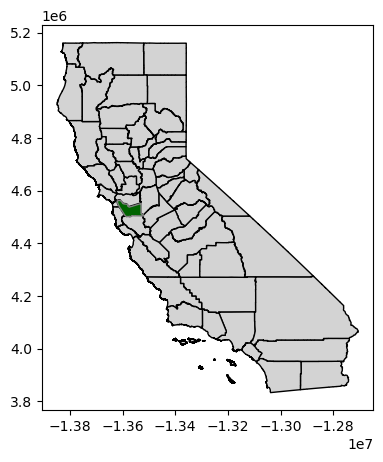

In [22]:
# Plot Alameda County and other counties together!
fig, ax = plt.subplots(figsize=(5,5))
counties.plot(color='lightgrey', edgecolor='black', ax=ax)
alameda_county.plot(color='darkgreen', edgecolor='gray', ax=ax)

<a id='section4'></a>

# 4. Mapping and Spatial Analysis

## More Data More Maps: Bay Area Bike Facilities

Let's overlay more data on the base map. Here I find [Bay Area Bike Facilities](https://opendata.mtc.ca.gov/datasets/MTC::regional-bike-facilities/about) from the Metropolitan Transportation Commission (MTC). 

<Axes: >

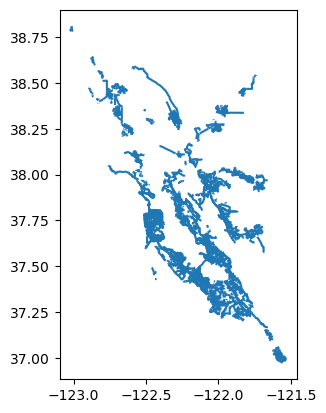

In [23]:
bike_facilities = gpd.read_file('../data/Regional_Bike_Facilities/regional_bike_facilities.shp')
bike_facilities.plot()

In [24]:
bike_facilities.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

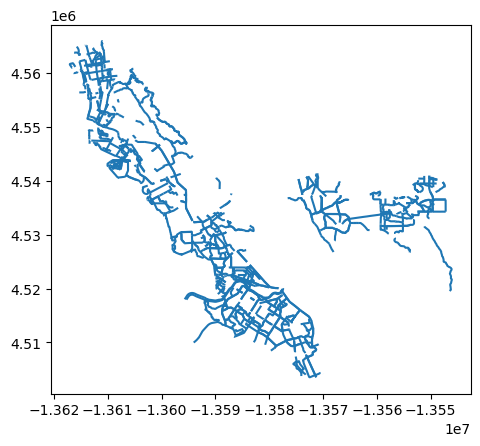

In [25]:
# clip bike data to Alameda County
from shapely.geometry import box

bike_facilities_map = bike_facilities.to_crs("epsg:3857")
bike_facilities_alameda = bike_facilities_map.clip(alameda_county)

bike_facilities_alameda.plot()

## More Data More Maps: Alameda County Schools

Let's map [schools](https://data.acgov.org/datasets/85ae178d95c14238beb8a8026b341ba8/explore) in Alameda County. 

<Axes: >

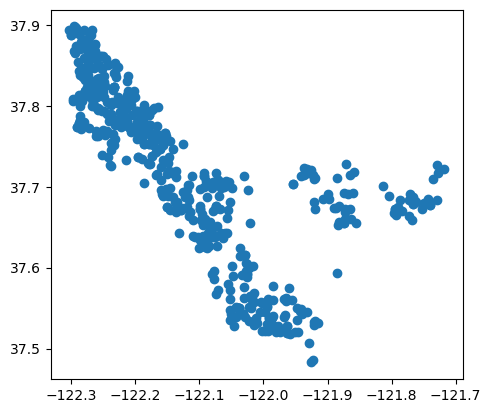

In [27]:
school_alameda = gpd.read_file('../data/Alameda_County_Schools-shp/b473366f-78f7-4b88-acea-9f45112f16cd202044-1-1vusbuh.pzsg.shp')
school_alameda.plot()

### Subsubsection [EDIT ME]

Use H3 headers for subsubsections, in Title Case, following [APA rules](https://apastyle.apa.org/style-grammar-guidelines/capitalization/title-case). Don't go lower than H3 if you can avoid it.

<details><summary><a>Expandable sections</a></summary>
Expandable sections like these can be used for hints, or for information that is optional or more advanced, and you do not want to immediately expose to all workshop participants. Use these expandable sections scarcely!
</details>


<a id='section2'></a>

# Section Name [EDIT ME]



## 🥊 Challenge #: [Name of Challenge]

- Challenges are typically formatted as subsection (##). Title Case applies.
- Challenges use the 🥊 Boxing Glove emoji in the header.
- Try to have at least one exercise every 15 minutes of instruction. More is better. A two-hour workshop needs at least **six challenges**.
- Challenges have names and are numbered. You should reference them in the Solutions file.
- Plan around 8 minutes for each challenge (including discussion of the solution and questions).
- Don't use "Bonus Challenges" or the like. If really needed, use a "Take-Home Challenge" (1 max!) so it's clear these can be completed outside the workshop.
- Copy filled-in challenges over to a solutions notebook that goes into the "solutions "folder. 

### *Example:*

## 🥊 Challenge 1: Printing!

Write your own `print()` statement in the code cell below. Follow the syntax of the example above, and change the text in the quotation marks.


In [ ]:
# You may have some starter code for the challenge that you can put in its own cell.
# Always have a following cell that says "YOUR CODE HERE" with a few empty lines beneath it, 
# so that attendees know where to put their code.

In [ ]:
# YOUR CODE HERE




In [ ]:
# You may also use scaffolding. Use three dots (...) to indicate scaffolding.

def ...:
    # YOUR CODE HERE
    return ...

💡 **Tip**: 
- Tips can be formatted as subsection (##) when they're more substantial.
- Tips use the 💡 Electric Light Bulb Emoji in the header / at the start of the line, followed by boldface **Tip:**, followed by the tip. 
- Tips are not numbered.
- Keep them short and to the point.
- See the Jupyter notebook template for an example.

### *Example:*

💡 **Tip**: A method is written with parenteses: e.g. `gap.value_counts()`. An attribute is written without parentheses: e.g. `gap.columns`.


## 💡 Tip: [Name of Tip]
- Tips can be formatted as subsection (##) when they're more substantial. Title Case applies.
- Tips use the 💡 Electric Light Bulb Emoji in the header.
- Tips are not numbered.
- Keep them short and to the point.
- See the Jupyter notebook template for an example.

🔔 **Question:** 
- Questions are used without header. 
- Questions use the 🔔 Bell Emoji at the start of the line, followed by boldface **Question:**, followed by the question.
- Questions are short queries about code or concepts. 
- Questions do not require participants to enter code. 
- Questions can be used as attention checks, and discussed during the workshop.
- See the Jupyter notebook template for an example.

*Example:*

🔔 **Question**: what will the output of the following code be?

In [ ]:
numbers = [12, 20, 43, 88, 97, 100, 105, 110]

for number in numbers:
    if number > 100:
        print(number, 'is greater than 100.')

📝 **Poll**

- Polls refer to Zoom polls, which can be used as a form of formative assessment.
- Talk to D-Lab staff if you want to create Zoom polls before adding them in the notebook.
- Polls use the 📝 memo enoji at the start of the line, followed by boldface **Poll**, followed by the name of the poll.
- Polls are named with the format {workshop name}{workshop part - poll number}
- make sure to check if they are **activated** by clicking "Polls/Quizzes" in Zoom.
- Polls are used without header.

### *Example:*

📝 **Poll PyInt 2-2:**  Why are only some of the columns in the `DataFrame` visible in the output?

<a id='demo'></a>


# 🎬 Demo: [Title Of Demo]

- Demos can be used at the end of a notebook to show / highlight some advanced functionalities outside the scope of the workshop. 
- Demos are written as main sections (#) that are linked to in the "Sections" section. Title Case applies.
- Demos use the 🎬 Clapper Board Emoji at the start of the header.
- Demos can used once per notebook.
- Demos can be used to enthuse participants, and to point them to relevant other D-Lab workshops.
- Demos are meant to be short: 5-10 mins max.

### *Example:*

# 🎬 Demo: Working With Data Frames

To cap off this workshop, here's a demo to see what reproducible data science with Python looks like.
Just run the code cell below, and don't worry if you don't understand everything!

* We'll be using a `pandas` DataFrame to store and manipulate the data - you'll learn more about `pandas` and DataFrames in the next workshop!
* Our data comes from the California Health Interview Survey (CHIS), the nation's largest state health survey. 

Let's have a look at the data:

In [ ]:
import pandas as pd

# Reading in a comma-seperated values file
chis_df = pd.read_csv('some_file.csv')
chis_df.head()

Looks like we have a bunch of information here. Let's focus on the column for the number of sodas people have per day (the "number_sodas" column), and whether people rent or own a house (the "tenure" column).

In the next steps, we'll...
1. change the datatype of a column,
2. create dummy variables (variables that take values of 0 and 1), and 
3. group our data.

This allows us to calculate the average amount of sodas consumed by people who do and do not own a house.

In [ ]:
# Changing the data type of a column
chis_df['number_sodas'] = chis_df['number_sodas'].astype(float)

# Creating dummy variables
chis_dummies = pd.get_dummies(chis_df, columns=['tenure'])

# Grouping the average number of consumed sodas by people who own a house
chis_dummies['number_sodas'].groupby(chis_dummies['tenure_OWN']).mean()

Note: For more information, see the `style.md` file in the main folder.

<div class="alert alert-success">

## ❗ Key Points

* EDIT ME. Recap the most useful information in this notebook. Keep it short and use action words. Min 3, max 8.
* EDIT ME. Recap the most useful information in this notebook. Keep it short and use action words. Min 3, max 8.
* EDIT ME. Recap the most useful information in this notebook. Keep it short and use action words. Min 3, max 8.

</div>